# L1 and L2 Regularized Logistic Regression

(You can find all of the code presnted here on my GitHub - https://github.com/JTDean123)

The goal of regression is to create a model that can predict the values of a dependent (response) variable based on independent (explanatory or predictor) variables.  The classical ordinary least squares linear regression model attempts to model a continuous dependent variable as a function of independent variables and this takes the form:  

\begin{equation*}
y_i   = B_0 + B_1*x_i
\end{equation*}  

where y and x represent dependent and independent variables, respectively.  The difference between the actual value of the response variable and the predicted value by the model is referred to as the residual, and based on this the linear regression model is written as:

\begin{equation*}
y_i   = B_0 + B_1*x_i + e_i
\end{equation*}  

Note that above we show a model with one predictor variable, x, but this model is easily generalized to multivariate form as:

\begin{equation*}
y_i = B_0 + \left( \sum_{k=1}^n B_k*x_{ik} \right) + e_i
\end{equation*}  

The loss function for ordinary least squares linear regression is the sum of the squares of the residuals (RSS):  

\begin{equation*}
RSS =  \frac{1}{2}\left( \sum_{i=1}^n e_i \right)^2 = \frac{1}{2}\left( \sum_{i=1}^n y_i - (B_0 + B_1*x_i) \right)^2 
\end{equation*}  

As mentioned above, this model is suitable for predicting dependent variables that are continuous, and the model is constrained by infinity:  

\begin{equation*}
-{\infty} < B_0 + B_1*x_i < +{\infty}
\end{equation*}  

However, what options do we have if the dependent variable is not continuous, like height, but is instead binary, like survival?  For example, we might wish to build a regression model to determine survival in the context of a drug treatment as a function of variables like dosing, patient weight, and so on.  Furthermore, we might also wish to assign a probability to a predicted outcome rather than predict a binary outcome.  Predicting a 51% chance of survival may have a different interpretation than a prediction of a 98% chance of survival.  Framed in this way, the above model is not suitable for this application because probabilities take values between zero and one but the linear regression model described above is constrained by infinity.  So, we wish to model a binary outcome based on a linear combination of predictor variables as follows:  

\begin{equation*}
P(y=1 | x) = f(B_0 + B_1*x_i) \\
\end{equation*} 

\begin{equation*}
P(y=0 | x) = 1 - P(y=1 | x) = 1 - f(B_0 + B_1*x_i)
\end{equation*}  

Where:

\begin{equation*}
0 \leq f(x) \leq 1
\end{equation*}  

One way to accomplish this is to let f be given by the logistic function such that:

\begin{equation*}
P(y=1 | x) = \frac{e^{(B_0 + B_1*x_i)}}{1+e^{(B_0 + B_1*x_i)}} = \frac{1}{1+e^{-(B_0 + B_1*x_i)}}
\end{equation*}  

This logistic function is useful for a number of reasons:  

* The probability described by this function is bounded by zero and one  
<br>
* Increasing the probability for large values of P requires a larger change in x than for values of P close to 0.5 (diminishing returns)

Since the logistic regression model described here will predict probabilities we can fit using maximum likelihood.  The likelihood for one observation takes on the same form as that of a Bernoulli random variable:

\begin{equation*}
P(y=y_i | x_i) = P(y_i=1 | x_i)^{y_i} * (1 - (P(y_i=1 | x_i))^{1-y_i}
\end{equation*}  

The form of this equation is useful because one of the two terms on the right hand side of the equation will drop out depending on the value of y.  For example:

\begin{equation*}
y = 1:  \\
P(y=1 | x_i) = P(y_i=1 | x_i)^{1} * (1 - (P(y_i=1 | x_i))^{1-1} = P(y_i=1 | x_i)
\end{equation*}

and, 

\begin{equation*}
y = 0:  \\
P(y=0 | x_i) = P(y_i=1 | x_i)^{0} * (1 - (P(y_i=1 | x_i))^{1-0} = 1 - (P(y_i=1 | x_i)
\end{equation*}  

The likelihood for more n observation takes on the form:

\begin{equation*}
L = \prod_{i=1}^{n}P(y=y_i | x_i)
\end{equation*}  

\begin{equation*}
L = \prod_{i=1}^{n}P(y_i=1 | x_i)^{y_i} * (1 - (P(y_i=1 | x_i))^{1-y_i}
\end{equation*}  

This likelihood is in a troublesome form, and we can ease troubles by applying a montonic transformation by taking the log of the likelihood and turning products into sums:

\begin{equation*}
L = \prod_{i=1}^{n}P(y_i=1 | x_i)^{y_i} * (1 - (P(y_i=1 | x_i))^{1-y_i}
\end{equation*}  

\begin{equation*}
L = \sum_{i=1}^n y_i*log(P(y_i=1 | x_i) + ({1-y_i})*(1 - (P(y_i=1 | x_i))
\end{equation*}  

If we re-write:

\begin{equation*}
P(y_i=1 | x_i)
\end{equation*}  

as the probability that the yi belongs to the class defined as 1, then we can re-write the log likelihood as:

\begin{equation*}
L = \sum_{i=1}^n y_i*log(p_i) + ({1-y_i})*log(1 - (p_i))
\end{equation*}  

As before, this likelihood has two components and only one will remain for each i.  Maximum likelihood is next determined by setting the derivative of the log likelihood equal to zero and solving for the model parameters, in this case B0 and B1, and this is done computationally.  Thus the loss function for the logistic regression model is equal to the negative of the log likelihood!  (I think this is a beautiful result).  

Therefore the logistic regression loss funciton (J), without regularization, is equal to:

\begin{equation*}
J = -\sum_{i=1}^n y_i*log(p_i) + ({1-y_i})*log(1 - (p_i))
\end{equation*} 

We also have the option to include regularization in our loss function.  Regularization is a way to prevent overfitting by adding an additional component to the loss function that penalizes for overfitting.  Here we are concerned with two types of regularization:  

* L1 regularization:  add the absolute value of all of the coefficients in the model
<br>
* L2 regularization:  add the square of all of the coefficients in the model

Overfitting is typically characterized by models with large coefficients, so regularization presents a strategy for improving the generalizability of a model.

For both L1 and L2 regularization the sum or sum of squares of the model coefficients are multiplied by a hyperparameter lambda that controls the strength of regularization.  Intuitively, L2 regularization heavily penalizes large coeffients, and thus aims to assign small values to all coefficients.  In contrast, L1 regularization leads to coeffients becoming sparse during optimization, therefore only a small subset of features will be incorporated into the model.  Which one is better?  The answer to this is the same as for most machine learning questions - it depends!  There is no free lunch!

https://en.wikipedia.org/wiki/No_free_lunch_theorem

Taken together, we can write our complete loss fuctions for both L1 and L2 regularized logistic regression.

**L1 loss function:**

\begin{equation*}
J_{L1} = -\sum_{i=1}^n y_i*log(p_i) + ({1-y_i})*log(1 - (p_i)) + \Lambda\|x\|
\end{equation*} 


**L2 loss function:**

\begin{equation*}
J_{L2} = -\sum_{i=1}^n y_i*log(p_i) + ({1-y_i})*log(1 - (p_i)) + \Lambda\|x\|^2
\end{equation*} 

In this example I will compare L1 vs L2 regularized logistic regression for data pertaining to vaccines.  

# Vaccination Data

Whether or not a child completes their suggested vaccinations may depend on multiple factors such as age, race, and insurance.  Barat et al compiled data from 1413 vaccination candidates and collected ten features, including whether or not the patient finished their vaccination program.  Details of the study can be found here:

http://ww2.amstat.org/publications/jse/v19n1/barat.pdf  

As we have discussed above, this data set lends itself to a logistic regression model since the response variable, vaccine completion, is binary:  either a person was vaccinated or they were not.  Additionally, the following variables are available in this data set-

**Age** = the patient's age in years  

**AgeGroup** = the age group in which the patient falls (0 = 11-17 years, 1 = 18-26 years)  

**Race** = the patient's race (0 = white, 1 = black, 2 = Hispanic, 3 = other/unknown)  

**Shots** = the number of shots that the patients completed during a period of 12 months from
the time of the first shot  

**Completed** = did the patient complete the three-shot regimen within the recommended period
of 12 months (0 = no, 1 = yes)  

**InsuranceType** = the type of insurance that the patient had (0 = medical assistance, 1 = 
private payer [Blue Cross Blue Shield, Aetna, Cigna, United, Commercial, CareFirst], 2 = 
hospital based [EHF], 3 = military [USFHP, Tricare, MA])  

**MedAssist** = did the patient have some type of medical assistance (0 = no, 1 = yes)  

**Location** = the clinic that the patient attended (1 = Odenton, 2 = White Marsh, 3 = 
Johns Hopkins Outpatient Center, 4 = Bayview)  

**LocationType** = was the clinic in a suburban or an urban location (0 = suburban, 1 = urban)  

**PracticeType** = the type of practice that the patient visited (0 = pediatric, 1 = family
practice, 2 = OB-GYN)  

Before moving forward with a logistic regression model, we state the hypothesis for this study -

We can predict whether or not a patient was vaccinated based on their Age, the LocationType, and their Race.

#  Exploratory Data Analysis

We start by loading the data set into pandas.

In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
import random
random.seed(123)

In [164]:
vaccine = pd.read_csv('vaccine.data.csv')
vaccine.head()

,Age,AgeGroup,Race,Shots,Completed,InsuranceType,MedAssist,Location,LocationType,PracticeType
0,21,1,0,3,1,3,0,1,0,1
1,21,1,0,3,1,3,0,1,0,1
2,20,1,0,1,0,1,0,1,0,1
3,14,0,0,3,1,3,0,1,0,0
4,17,0,3,2,0,3,0,1,0,1


As mentioned above, we will keep the features Age, Race, LocationType, and Completed.

In [165]:
vaccine = vaccine[['Age', 'Race', 'LocationType', 'Completed']]
vaccine.head()

,Age,Race,LocationType,Completed
0,21,0,0,1
1,21,0,0,1
2,20,0,0,0
3,14,0,0,1
4,17,3,0,0


We next check for any missing data.

In [4]:
vaccine.isnull().values.any()

False

No missing data!  We can now perform exploratory data analysis.  

In [5]:
vaccine['Age'].describe()

count    1413.000000
mean       18.547063
std         4.234129
min        11.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        26.000000
Name: Age, dtype: float64

The average age is 18.5, and the maximum age is 26 and the minimum is 12.  We can visualize this with a histogram.

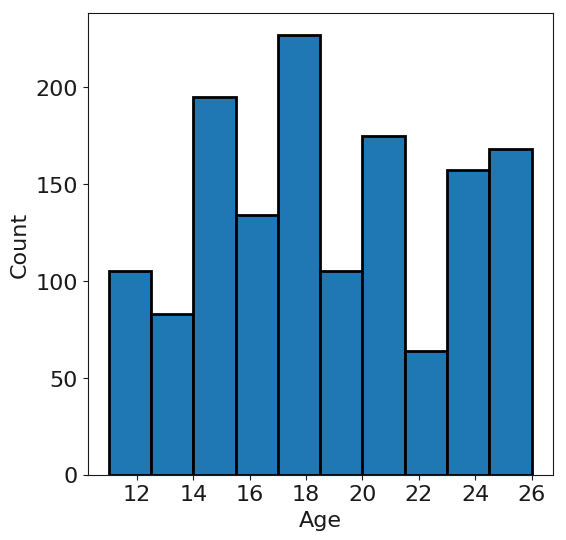

In [365]:
plot = vaccine['Age'].plot(kind='hist', figsize=(6, 6), legend=False, fontsize=16, edgecolor = 'black', linewidth=2);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Age', fontsize=16)
plt.show()
plt.rcdefaults()

We next look at the distribution of races in the study.  As described above, the race data has the following designation:  

**Race** = the patient's race (0 = white, 1 = black, 2 = Hispanic, 3 = other/unknown)  

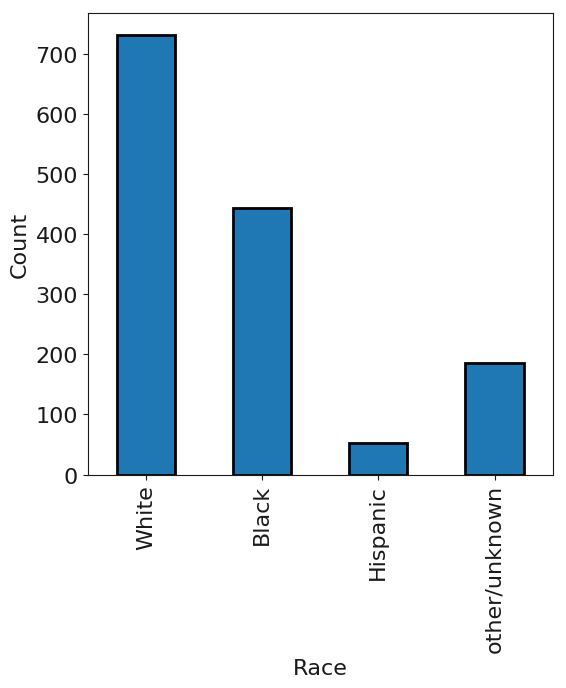

In [366]:
race = vaccine.groupby('Race')['Race'].count()
race = pd.DataFrame(race)
types = ['White', 'Black', 'Hispanic', 'other/unknown']
types = pd.DataFrame(types)
race['type'] = types
race = race.set_index('type')
race.columns = ['Count']
race.head()

plot = race['Count'].plot(kind='bar', figsize=(6, 6), fontsize=16, edgecolor = 'black', linewidth=2);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Race', fontsize=16)
plt.show()
plt.rcdefaults()

The majority of the patients were White or Black.  We perform similar analysis for location type.  As described above, the following designations are used for LocationType:  

**LocationType** = was the clinic in a suburban or an urban location (0 = suburban, 1 = urban)  

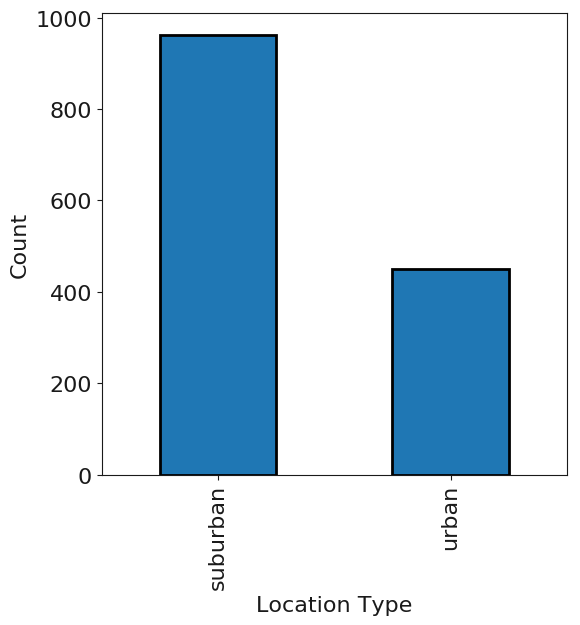

In [367]:
loc = vaccine.groupby('LocationType')['LocationType'].count()
loc = pd.DataFrame(loc)
types = ['suburban', 'urban']
types = pd.DataFrame(types)
loc['type'] = types
loc = loc.set_index('type')
loc.columns = ['Count']
loc.head()

plot = loc['Count'].plot(kind='bar', figsize=(6, 6), fontsize=16, edgecolor = 'black', linewidth=2);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Location Type', fontsize=16)
plt.show()
plt.rcdefaults()

Over 70% of the patients attended a hospital in a suburban location.

In [368]:
import warnings
warnings.filterwarnings('ignore')
vaccineC = vaccine.copy()

for i, loc in enumerate(vaccine['LocationType']):
    if loc == 0:
        vaccineC['LocationType'][i] = "suburban"
    else:
        vaccineC['LocationType'][i] = "urban"

for i, loc in enumerate(vaccine['Race']):
    if loc == 0:
        vaccineC['Race'][i] = "White"
    elif loc == 1:
        vaccineC['Race'][i] = "Black"
    elif loc == 2:
        vaccineC['Race'][i] = "Hispanic"
    else:
        vaccineC['Race'][i] = "other/unknown"

In [369]:
groups = vaccineC.groupby(['LocationType', 'Race'])['Age'].count()
groups = pd.DataFrame(groups)
groups.columns = ['Count']
groups

Count
LocationType Race                
suburban     Black            245
             Hispanic          21
             White            534
             other/unknown    163
urban        Black            198
             Hispanic          31
             White            198
             other/unknown     23

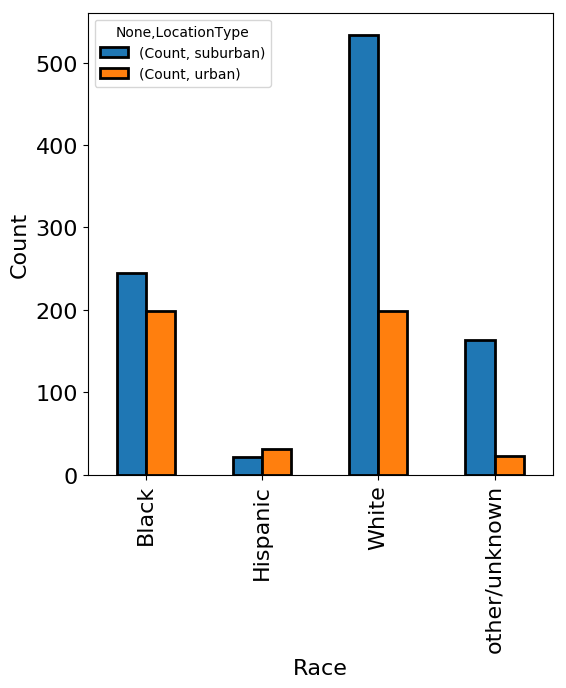

In [54]:
groups = groups.unstack("LocationType")
plot = groups.plot(kind='bar', figsize=(6, 6), fontsize=16, edgecolor = 'black', linewidth=2);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Race', fontsize=16)
plt.show()
plt.rcdefaults()

As shown above, we find that White patients were the biggest race group in suburban hospitals while Black patients were the largest group in urban hospitals.  Finally, we examine vaccine completion for different groups of patients.  First, we calculate the fraction of patients that completed their treatment.

In [454]:
complete = vaccine['Completed']
complete.sum() / len(complete)

0.3319179051663128

About one out of three patients completed their treatment.  We next look for a relationship between age and completion.

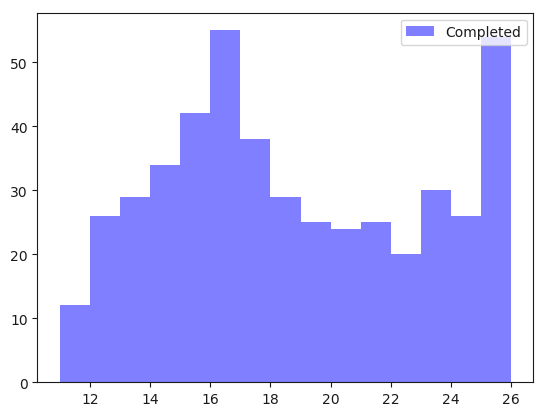

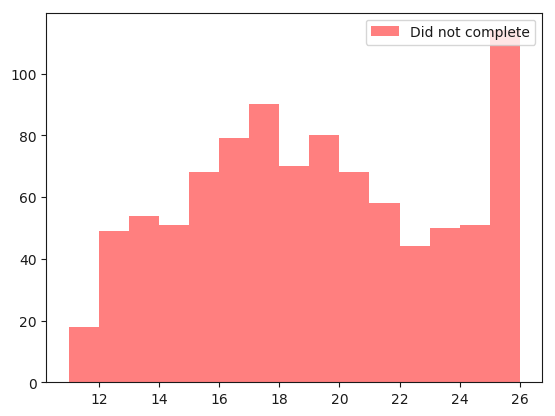

In [145]:
ageC = []
ageNC = []

for i, comp in enumerate(vaccineC['Completed']):
    if comp == 1:
        ageC.append(vaccineC['Age'][i])
    else:
        ageNC.append(vaccineC['Age'][i])
        
plt.hist(ageC, bins=15, alpha=0.5, label='Completed', color='blue')
plot.set_ylabel('Age', fontsize=16)
plot.set_xlabel('Count', fontsize=16)
plt.legend(loc='upper right')
plt.show()
plt.rcdefaults()

plt.hist(ageNC, bins=15, alpha=0.5, label='Did not complete', color='red')
plot.set_ylabel('Age', fontsize=16)
plot.set_xlabel('Count', fontsize=16)
plt.legend(loc='upper right')
plt.show()
plt.rcdefaults()

There does not appear to be a relationship between age and completion of the vaccine program, therefore we will exclude this feature from our model.  We next evaluate vaccine treatment completion and race.

In [146]:
completeGroup = vaccineC.groupby(['Race', 'Completed'])['Age'].count()
completeGroup = pd.DataFrame(completeGroup)
completeGroup.columns = ['Count']
completeGroup

Count
Race          Completed       
Black         0            338
              1            105
Hispanic      0             35
              1             17
White         0            452
              1            280
other/unknown 0            119
              1             67

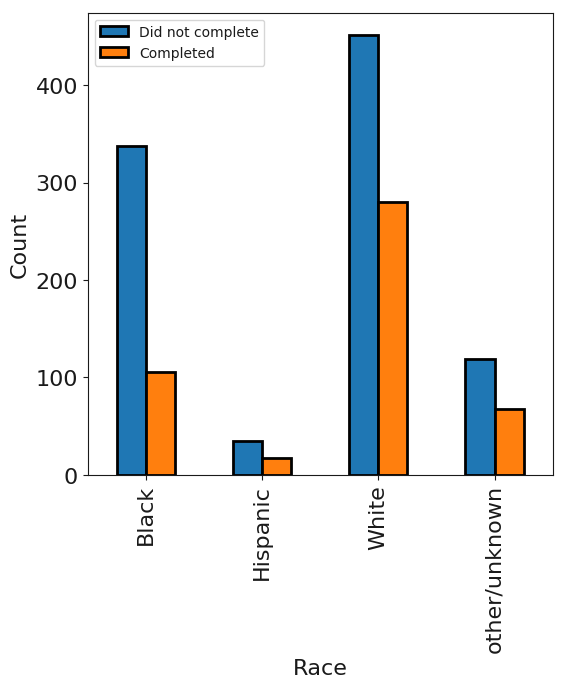

In [98]:
completeGroup = completeGroup.unstack("Completed")
completeGroup.columns = ['Did not complete', 'Completed']
plot = completeGroup.plot(kind='bar', figsize=(6, 6), fontsize=16, edgecolor = 'black', linewidth=2);
plot.set_ylabel('Count', fontsize=16)
plot.set_xlabel('Race', fontsize=16)
plt.show()
plt.rcdefaults()

The majority of patients in all race groups did not complete the vaccination program.

# Logistic Regression Models 

Now that we have cleaned up the data set and extracted relevant features we are in a position to create L1 and L2 regularized logistic regression models.  As mentioned above, we will remove the Age feature from the model.

In [166]:
vaccine = vaccine.ix[:, vaccine.columns != 'Age']

The first step in this supervised machine learning exercise is convert Race and LocationType to categorical dummy variables and split the data into test and training sets (70:30).  Note that when we use dummy variables we exclude one of them, in this case the first one, to avoid collinearity.  

In [167]:
dummy_ranks = pd.get_dummies(vaccine['Race'], prefix='Race')
dummy_ranks2 = pd.get_dummies(vaccine['LocationType'], prefix='LocationType')
vaccine = vaccine[['Completed']].join(dummy_ranks.ix[:,'Race_1':])
vaccine = vaccine[list(vaccine)].join(dummy_ranks2.ix[:,'LocationType_1':])

In [168]:
msk = np.random.rand(len(vaccine)) < 0.7
vaccineTrain = vaccine[msk]
vaccineTest = vaccine[~msk]

vaccineTrain_features = np.array(vaccineTrain.ix[:, vaccineTrain.columns != 'Completed'])
vaccineTrain_lables = np.array(vaccineTrain[['Completed']])
vaccineTrain_lables = vaccineTrain_lables.ravel()

vaccineTest_features = np.array(vaccineTest.ix[:, vaccineTest.columns != 'Completed'])
vaccineTest_lables = np.array(vaccineTest[['Completed']])
vaccineTest_lables = vaccineTest_lables.ravel()

Next we do hyperparameter tuning with both L1 and L2 regularized logistic regression using the liblinear solver (the only one that supports L1 regularization), create a model, and then make prediction.  The variable that we are searching for here is 'C', the regularization coefficient, and we will find this using ten fold cross validation.  After tuning, we fit the model and then make predictions with the test data.

In [169]:
L1cv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))), random_state=333, scoring='neg_log_loss', cv=10, penalty='l1', solver='liblinear')
L1cv.fit(vaccineTrain_features, vaccineTrain_lables)
predsL1 = L1cv.predict(vaccineTest_features)

L2cv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),random_state=333, scoring='neg_log_loss', cv=10, penalty='l2', solver='liblinear')
L2cv.fit(vaccineTrain_features, vaccineTrain_lables)
predsL2 = L2cv.predict(vaccineTest_features)

Now that we have tuned model parameters and used the model to fit our test data we can look evaluate the predictions with confusion matrices.  We first look at the L1 model confusion matrix.

In [170]:
# L1 regularized logistic regression confusion matrix
l1v1 = pd.DataFrame(confusion_matrix(vaccineTest_lables, predsL1))
l1v1.columns = ['Predicted 0', 'Predicted 1']
l1v1.index = ['Actual 0', 'Actual 1']
l1v1

,Predicted 0,Predicted 1
Actual 0,328,0
Actual 1,128,0


In [171]:
# L2 regularized logistic regression confusion matrix
l2v1 = pd.DataFrame(confusion_matrix(vaccineTest_lables, predsL2))
l2v1.columns = ['Predicted 0', 'Predicted 1']
l2v1.index = ['Actual 0', 'Actual 1']
l2v1

,Predicted 0,Predicted 1
Actual 0,328,0
Actual 1,128,0


Both of the models predict a label of 0 for all of the test observations!  This implies that the model is no better than a random guess, as the true positive rate equals the false positive rate.  

<br>
The true positive rate is given as:  true positive / (true positive + false negative)  

The false positive rate is given as:  false positive / (false positive + true negative)  

Therefore, the true positive rate for the two cases above is equal to:  0 / (0 + 128) = 0

and the false positive rate is equal to:  0 / (0 + 328) = 0  

<br>

To (try to) improve the predictive power of this model we will add additional features:  

**InsuranceType** = the type of insurance that the patient had (0 = medical assistance, 1 = 
private payer [Blue Cross Blue Shield, Aetna, Cigna, United, Commercial, CareFirst], 2 = 
hospital based [EHF], 3 = military [USFHP, Tricare, MA])  

**Location** = the clinic that the patient attended (1 = Odenton, 2 = White Marsh, 3 = 
Johns Hopkins Outpatient Center, 4 = Bayview)  

**MedAssist** = did the patient have some type of medical assistance (0 = no, 1 = yes)

**PracticeType** = the type of practice that the patient visited (0 = pediatric, 1 = family practice, 2 = OB-GYN)

**AgeGroup** = the age group in which the patient falls (0 = 11-17 years, 1 = 18-26 years)  

In [227]:
vaccine = pd.read_csv('vaccine.data.csv')
vaccine = vaccine[['InsuranceType', 'Location', 'MedAssist', 'Race', 'LocationType','Completed', 'PracticeType', 'AgeGroup']]
vaccine.head()

,InsuranceType,Location,MedAssist,Race,LocationType,Completed,PracticeType,AgeGroup
0,3,1,0,0,0,1,1,1
1,3,1,0,0,0,1,1,1
2,1,1,0,0,0,0,1,1
3,3,1,0,0,0,1,0,0
4,3,1,0,3,0,0,1,0


As above, we now create dummy variables for the categorical variables.

In [228]:
dummy_ranks = pd.get_dummies(vaccine['Race'], prefix='Race')
dummy_ranks2 = pd.get_dummies(vaccine['LocationType'], prefix='LocationType')
dummy_ranks3 = pd.get_dummies(vaccine['InsuranceType'], prefix='InsuranceType')
dummy_ranks4 = pd.get_dummies(vaccine['Location'], prefix='Location')
dummy_ranks5 = pd.get_dummies(vaccine['PracticeType'], prefix='PracticeType')

vaccine = vaccine[['Completed', 'MedAssist']].join(dummy_ranks.ix[:,'Race_1':])
vaccine = vaccine[list(vaccine)].join(dummy_ranks2.ix[:,'LocationType_1':])
vaccine = vaccine[list(vaccine)].join(dummy_ranks3.ix[:,'InsuranceType_1':])
vaccine = vaccine[list(vaccine)].join(dummy_ranks4.ix[:,'Location_1':])
vaccine = vaccine[list(vaccine)].join(dummy_ranks5.ix[:,'PracticeType_1':])

,Completed,MedAssist,Race_1,Race_2,Race_3,LocationType_1,InsuranceType_1,InsuranceType_2,InsuranceType_3,Location_1,Location_2,Location_3,Location_4,PracticeType_1,PracticeType_2
0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0


And, exactly as above, we tune, build a model, and make predictions.

In [241]:
msk = np.random.rand(len(vaccine)) < 0.7
vaccineTrain = vaccine[msk]
vaccineTest = vaccine[~msk]

vaccineTrain_features = np.array(vaccineTrain.ix[:, vaccineTrain.columns != 'Completed'])
vaccineTrain_lables = np.array(vaccineTrain[['Completed']])
vaccineTrain_lables = vaccineTrain_lables.ravel()

vaccineTest_features = np.array(vaccineTest.ix[:, vaccineTest.columns != 'Completed'])
vaccineTest_lables = np.array(vaccineTest[['Completed']])
vaccineTest_lables = vaccineTest_lables.ravel()

L1cv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))),  random_state=333, scoring='neg_log_loss', penalty='l1', solver='liblinear', max_iter=10000)
L1cv.fit(vaccineTrain_features, vaccineTrain_lables)
predsL1 = L1cv.predict(vaccineTest_features)

L2cv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-10, 10))), random_state=333, scoring='neg_log_loss', cv=10, penalty='l2', solver='liblinear', max_iter=10000)
L2cv = LogisticRegression()
L2cv.fit(vaccineTrain_features, vaccineTrain_lables)
predsL2 = L2cv.predict(vaccineTest_features)

We next view the model results with confusion matricies.

In [230]:
# L1 regularized logistic regression confusion matrix
l1v2 = pd.DataFrame(confusion_matrix(vaccineTest_lables, predsL1))
l1v2.columns = ['Predicted 0', 'Predicted 1']
l1v2.index = ['Actual 0', 'Actual 1']
l1v2

,Predicted 0,Predicted 1
Actual 0,289,0
Actual 1,149,0


In [231]:
# L2 regularized logistic regression confusion matrix
l2v2 = pd.DataFrame(confusion_matrix(vaccineTest_lables, predsL2))
l2v2.columns = ['Predicted 0', 'Predicted 1']
l2v2.index = ['Actual 0', 'Actual 1']
l2v2

,Predicted 0,Predicted 1
Actual 0,268,21
Actual 1,131,18


By adding new features to the model we have improved the predictive power of the L2 regularized model.  

Using the definitions of true positive and false positive rates from above we have: 

true positive rate :  18 / (18 + 131) = 0.12

false positive rate:  21 / (21 + 268) = 0.07

So, for the L2 regularized model we have increased the true positive rate but unfortunately we have also increased the false positive rate.  We can better visualize this tradeoff between true positive rate and false positive rate with a ROC curve.

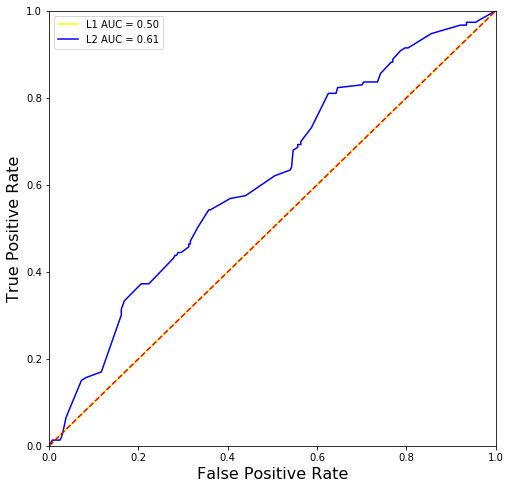

In [281]:
pred1 = L1cv.predict_proba(vaccineTest_features)[:,1]
fpr1, tpr1, _ = roc_curve(vaccineTest_lables, pred1)
roc_auc1 = auc(fpr1, tpr1)

pred2 = L2cv.predict_proba(vaccineTest_features)[:,1]
fpr2, tpr2, _ = roc_curve(vaccineTest_lables, pred2)
roc_auc2 = auc(fpr2, tpr2)

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

ax1.plot(fpr1, tpr1, 'b', label = 'L1 AUC = %0.2f' % roc_auc1, color='yellow');
ax1.plot(fpr2, tpr2, 'b', label = 'L2 AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'upper left')
ax1.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)
plt.show()

The ROC curve allows us to visualize the tradeoff between true positive and false positive rates as a function of cutoff threshold probabilities.  The area under a ROC curve for a model, AUC, allows us to quantitatively evaluate how well a binary classifier performs.  When a true positive rate equals the false positive rate the model has an AUC of 0.5.  This means that for a randomly selected sample with a label of 1 the probability of classifying it as 1 is equal to that of classifying it as 0.  As we found above, the L1 regularized model, which predicted a 0 label for all samples in the test set, had true positive rates equal to false positive rates for the threshold used in the predictive model.  As seen in the plot above, we find that the AUC of this L1 model is equal to 0.5, indicating that it is no better than a random guess.  However, we find that the AUC for the L2 model is 0.61, indicating that this model has better predictive performance than the L1 regularized model.  An AUC of of 0.61, although better than random, is generally not a great score.  I suspect that the features collected in this data set do not capture the variance in the vaccine completed label.  Additional things to try?  I suggest trying a SVM or random forest, but I will leave this for you!